___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [2]:
import os

# Set TF log level to ignore INFOs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [7]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [8]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [10]:
print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [11]:
# Checking the shape of one image
x_train[5].shape

(28, 28)

In [13]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

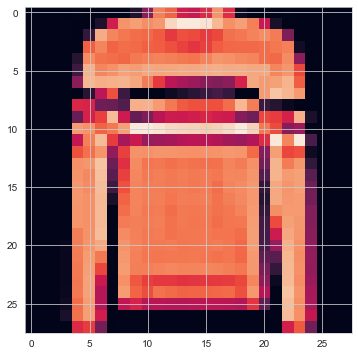

In [14]:
# view an image from the dataset.
plt.imshow(x_train[5])
plt.show()

In [20]:
y_train[5]

2

In [21]:
y_train.shape

(60000,)

In [22]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [15]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [24]:
y_train[0]

9

In [26]:
classes[y_train[0]]

'Ankle boot'

In [27]:
classes[int(y_train[0])]

'Ankle boot'

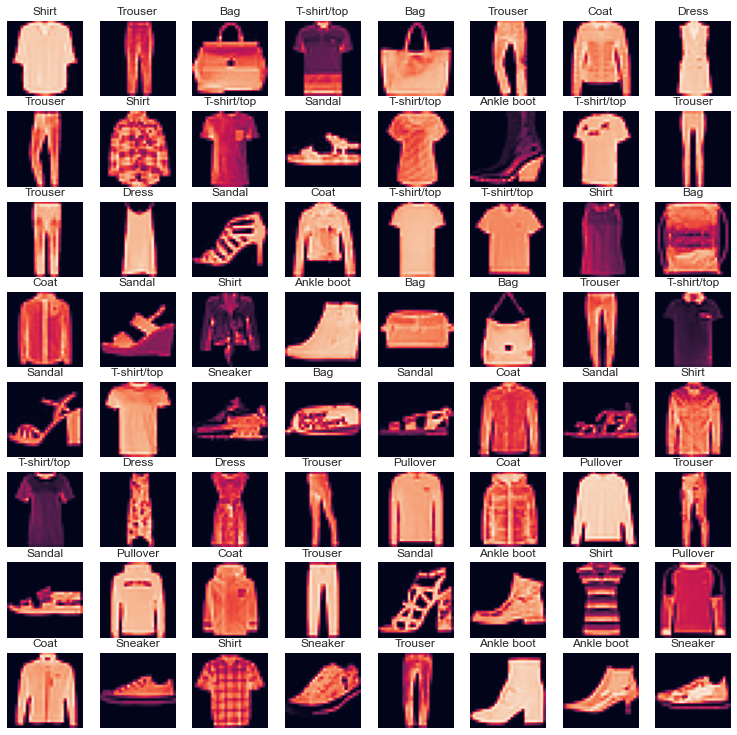

In [30]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(x_train[rand_index])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [31]:
x_train[5].min()

0

In [32]:
x_train[5].max()

255

In [34]:
# Normalize image pixels

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [35]:
x_train.shape

(60000, 28, 28)

In [36]:
x_test.shape

(10000, 28, 28)

In [38]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [39]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [40]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [42]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (1,1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor="val_accuracy", 
                           mode="max", 
                           patience=2,
                           restore_best_weights=True)

In [74]:
model.fit(x_train, y_train, 
          batch_size=64, 
          epochs=10, 
          validation_data=(x_test, y_test),
          callbacks=[early_stop])

Epoch 1/10
938/938 [==============================] - 32s 34ms/step - loss: 0.1211 - accuracy: 0.9570 - val_loss: 0.3389 - val_accuracy: 0.9038
Epoch 2/10
938/938 [==============================] - 33s 35ms/step - loss: 0.1042 - accuracy: 0.9633 - val_loss: 0.2977 - val_accuracy: 0.9141
Epoch 3/10
938/938 [==============================] - 53s 56ms/step - loss: 0.0959 - accuracy: 0.9659 - val_loss: 0.3058 - val_accuracy: 0.9084
Epoch 4/10
938/938 [==============================] - 50s 53ms/step - loss: 0.0837 - accuracy: 0.9709 - val_loss: 0.3389 - val_accuracy: 0.9149
Epoch 5/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0723 - accuracy: 0.9743 - val_loss: 0.3683 - val_accuracy: 0.9118
Epoch 6/10
938/938 [==============================] - 46s 49ms/step - loss: 0.0639 - accuracy: 0.9774 - val_loss: 0.3982 - val_accuracy: 0.9059


**TASK 7: Plot values of metrics you used in your model.**

In [50]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.388,0.862,0.356,0.876
1,0.249,0.910,0.284,0.900
2,0.203,0.926,0.264,0.908
3,0.170,0.939,0.310,0.896
4,0.146,0.948,0.301,0.905


<AxesSubplot:>

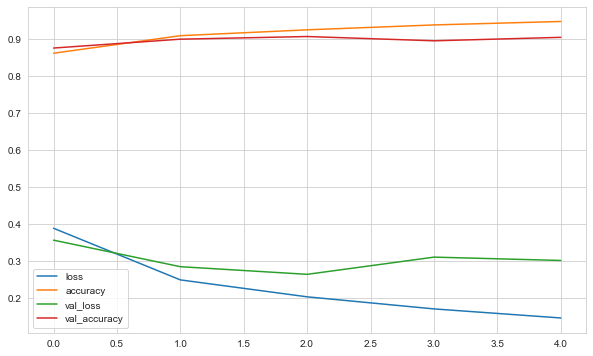

In [51]:
summary.plot()

<AxesSubplot:>

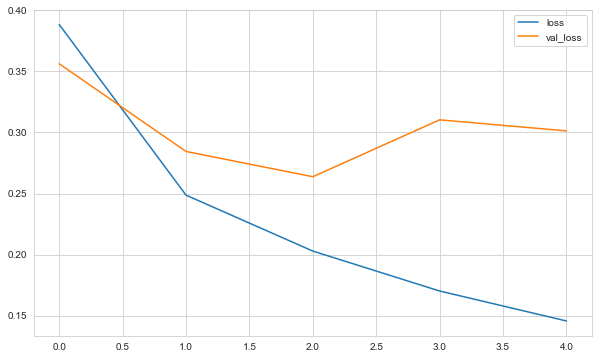

In [52]:
summary[["loss", "val_loss"]].plot()

<AxesSubplot:>

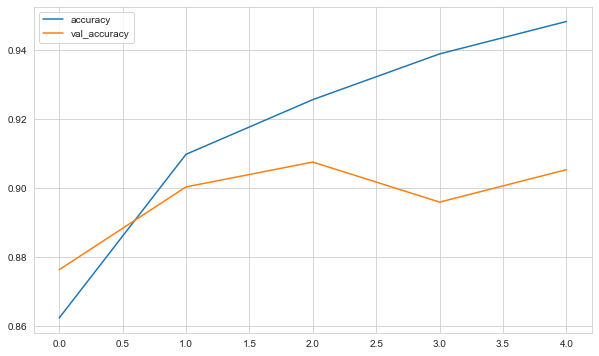

In [53]:
summary[["accuracy", "val_accuracy"]].plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [56]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2638 - accuracy: 0.9075


[0.2637559771537781, 0.9075000286102295]

In [57]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy", score[1])

Test loss:  0.2637559771537781
Test accuracy 0.9075000286102295


In [58]:
pred_prob = model.predict(x_test)
y_pred = np.argmax(pred_prob, axis=1)

313/313 [==============================] - 3s 9ms/step


In [59]:
pred_prob.shape

(10000, 10)

In [60]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [61]:
y_test_arg=np.argmax(y_test,axis=1)

In [62]:
Y_pred = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 3s 9ms/step


In [63]:
print(confusion_matrix(y_test_arg, Y_pred))

[[863   0  10  27   2   0  95   0   3   0]
 [  3 973   1  17   2   0   3   0   1   0]
 [ 26   0 802  15  70   0  87   0   0   0]
 [ 10   3   6 963   9   0   9   0   0   0]
 [  1   1  28  57 839   0  74   0   0   0]
 [  0   0   0   0   0 970   0  10   0  20]
 [ 95   0  38  42  56   0 766   0   3   0]
 [  0   0   0   0   0   7   0 957   1  35]
 [  5   0   1  12   4   1  12   2 963   0]
 [  1   0   0   0   0   4   0  16   0 979]]


In [64]:
print(classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.91      0.80      0.85      1000
           3       0.85      0.96      0.90      1000
           4       0.85      0.84      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.73      0.77      0.75      1000
           7       0.97      0.96      0.96      1000
           8       0.99      0.96      0.98      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<AxesSubplot:>

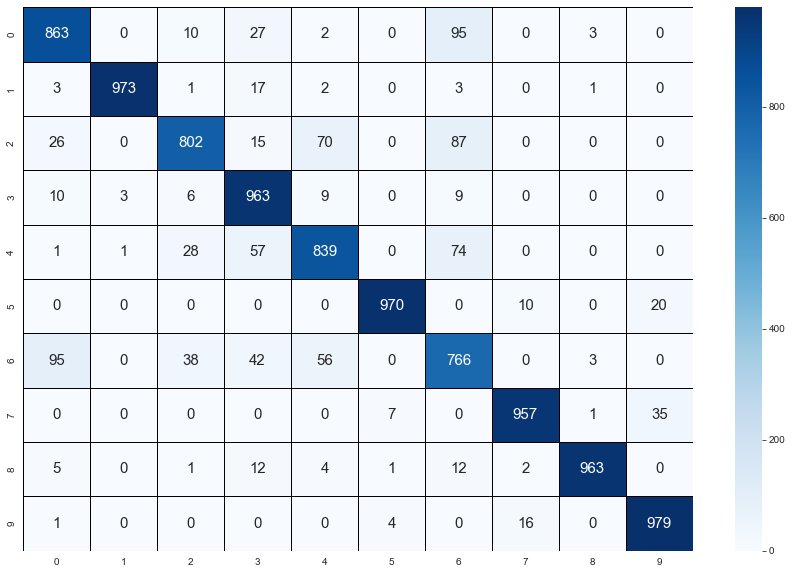

In [65]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test_arg, Y_pred), 
            annot=True, cmap="Blues", linewidth=0.5, linecolor="black",
            fmt="g", annot_kws={"size" : 15})

In [66]:
(y_test_arg != Y_pred).sum()

925

## Prediction

In [67]:
model.save("cnn-1.h5")

In [68]:
model = tf.keras.models.load_model("cnn-1.h5")

In [70]:
pred = model.predict(np.expand_dims(x_test[24], axis=0))
np.argmax(pred)

1/1 [==============================] - 0s 97ms/step


1

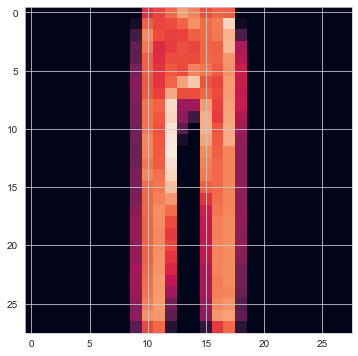

In [72]:
plt.imshow(x_test[24].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___